C:\Users\khushbhu\AppData\Local\Temp\ipykernel_14896\3528007182.py:30: RuntimeWarning: divide by zero encountered in divide
  divergence = np.arctan(w_z/z)  # Beam divergence


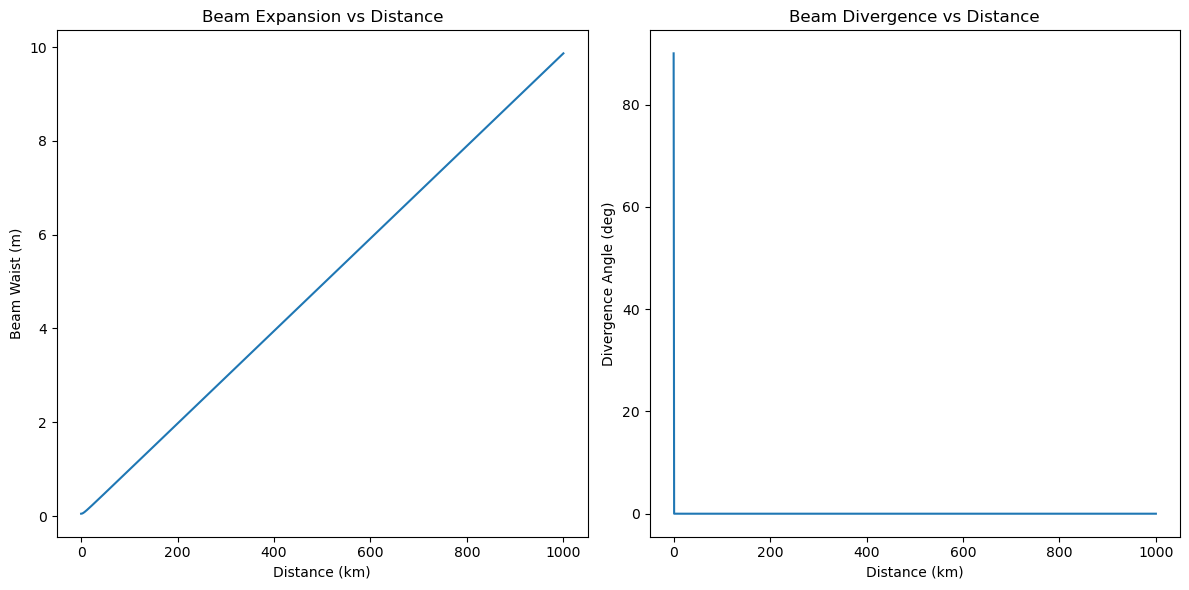

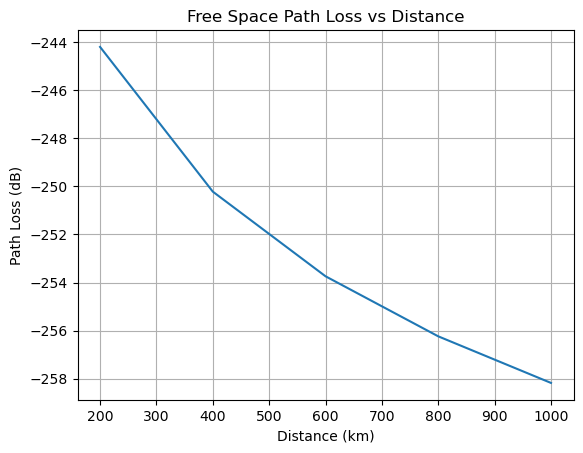

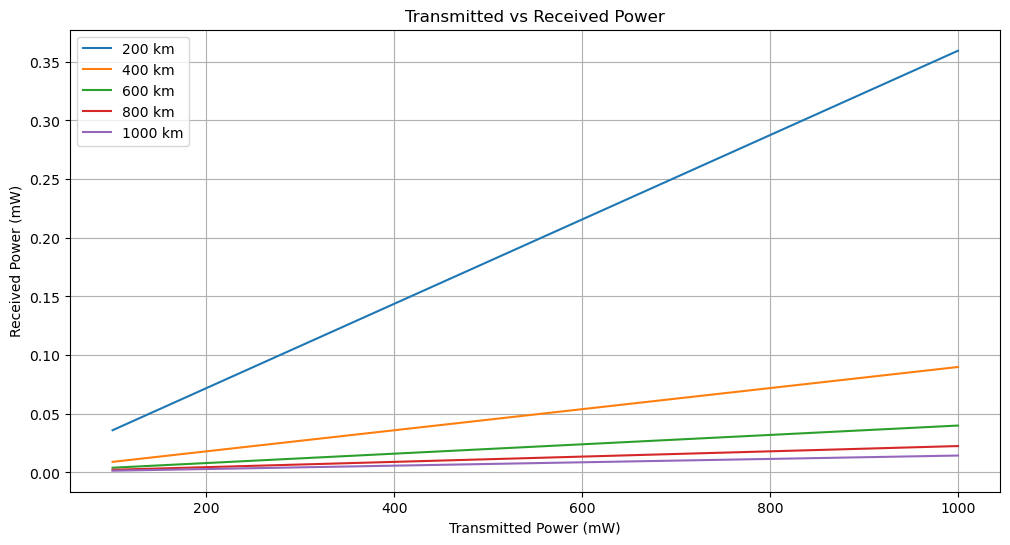

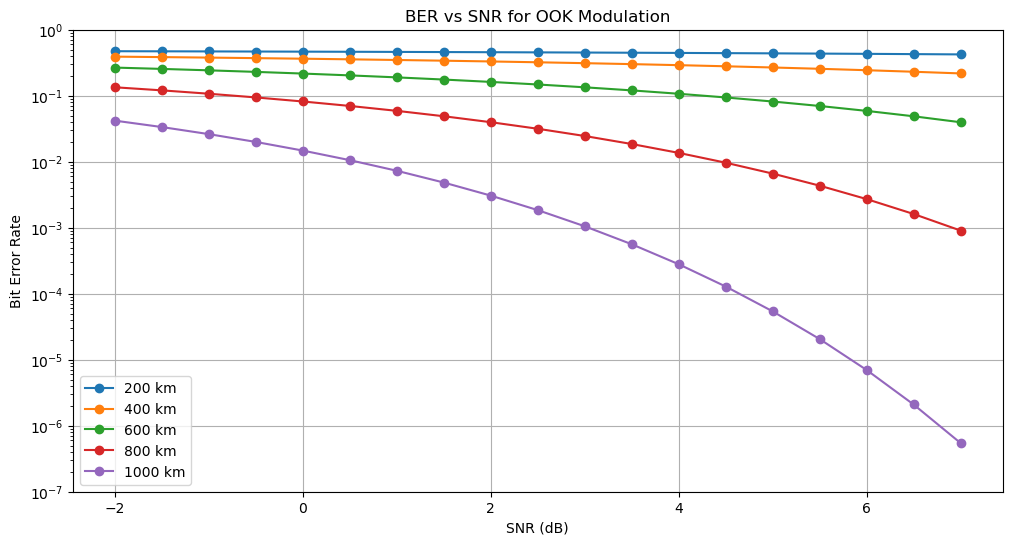

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# ========================
# Common Parameters & Constants
# ========================
c = 3e8  # Speed of light [m/s]
h = 6.626e-34  # Planck's constant [J·s]
q = 1.6e-19  # Electron charge [C]
kB = 1.38e-23  # Boltzmann constant [J/K]

# System parameters
wavelength = 1550e-9  # Optical wavelength [m]
D_tx = 0.1  # Transmitter aperture diameter [m]
D_rx = 0.1  # Receiver aperture diameter [m]
B = 1e9  # Bandwidth [Hz]
T = 300  # Temperature [K]
R = 0.65  # Photodiode responsivity [A/W]
F = 3  # Noise figure [dB]

# ========================
# Task 1: Beam Characterization
# ========================

def gaussian_beam(w0, z, wavelength):
    """Calculate Gaussian beam parameters"""
    z_R = np.pi * w0**2 / wavelength  # Rayleigh range
    w_z = w0 * np.sqrt(1 + (z/z_R)**2)  # Beam waist at distance z
    divergence = np.arctan(w_z/z)  # Beam divergence
    return w_z, divergence

def task1_beam_analysis():
    # Beam parameters
    w0 = 0.05  # Initial waist [m]
    distances = np.linspace(0, 1000e3, 1000)  # Up to 1000 km
    
    # Calculate beam spread
    w_z, divergence = gaussian_beam(w0, distances, wavelength)
    
    # Plotting
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(distances/1e3, w_z)
    plt.xlabel('Distance (km)')
    plt.ylabel('Beam Waist (m)')
    plt.title('Beam Expansion vs Distance')
  
    plt.subplot(1,2,2)
    plt.plot(distances/1e3, np.rad2deg(divergence))
    plt.xlabel('Distance (km)')
    plt.ylabel('Divergence Angle (deg)')
    plt.title('Beam Divergence vs Distance')
    plt.tight_layout()
    plt.savefig('beam_divergence.png')
    plt.show()
    
# ========================
# Task 2: Channel Characterization
# ========================

def free_space_path_loss(d, wavelength):
    """Calculate free space path loss"""
    return (wavelength / (4 * np.pi * d))**2

def task2_channel_analysis():
    distances = np.array([200e3, 400e3, 600e3, 800e3, 1000e3])
    FSPL = [free_space_path_loss(d, wavelength) for d in distances]
    
    plt.figure()
    plt.plot(distances/1e3, 10*np.log10(FSPL))
    plt.xlabel('Distance (km)')
    plt.ylabel('Path Loss (dB)')
    plt.title('Free Space Path Loss vs Distance')
    plt.grid()
    plt.savefig('free_space_path_loss.png')
    plt.show()
   
# ========================
# Task 3: Power Analysis
# ========================

def received_power(P_tx, d):
    """Calculate received power with system efficiencies"""
    η_tx = 0.8  # Transmitter efficiency
    η_rx = 0.7  # Receiver efficiency
    A_tx = np.pi*(D_tx/2)**2  # Transmitter aperture area
    A_rx = np.pi*(D_rx/2)**2  # Receiver aperture area
    
    FSPL = free_space_path_loss(d, wavelength)
    P_rx = P_tx * η_tx * η_rx * (A_tx * A_rx) / (wavelength**2 * d**2)
    return P_rx

def task3_power_analysis():
    P_tx_range = np.arange(100e-3, 1.001, 10e-3)
    distances = [200e3, 400e3, 600e3, 800e3, 1000e3]
    
    plt.figure(figsize=(12,6))
    for d in distances:
        P_rx = [received_power(P_tx, d)*1e3 for P_tx in P_tx_range]
        plt.plot(P_tx_range*1e3, P_rx, label=f'{int(d/1e3)} km')
    
    plt.title('Transmitted vs Received Power')
    plt.xlabel('Transmitted Power (mW)')
    plt.ylabel('Received Power (mW)')
    plt.legend()
    plt.grid()
    plt.savefig('transmitted_vs_received_power.png')
    plt.show()
    
# ========================
# Task 4: BER Analysis
# ========================

def ook_ber(snr_linear):
    """Calculate theoretical BER for OOK"""
    return 0.5 * erfc(np.sqrt(snr_linear/2))

def task4_ber_analysis():
    snr_db = np.arange(-2, 7.1, 0.5)
    snr_linear = 10**(snr_db/10)
    distances = [200e3, 400e3, 600e3, 800e3, 1000e3]
    P_tx = 200e-3  # 200 mW
    
    plt.figure(figsize=(12,6))
    for d in distances:
        P_rx = received_power(P_tx, d)
        
        # Calculate noise power (N0) - corrected calculation
        N0 = 2 * q * R * P_rx * 10**(F/10) + 4 * kB * T * B  # Enhanced noise calculation
        
    
   # Calculate SNR values for all SNR_dB values
        snr = 10**(snr_db/10) * N0 / (R * P_rx)**2
        
        # Calculate BER values for all SNR values
        ber = ook_ber(snr)
        
        plt.semilogy(snr_db, ber, marker='o', label=f'{int(d/1e3)} km')
    
    plt.title('BER vs SNR for OOK Modulation')
    plt.xlabel('SNR (dB)')
    plt.ylabel('Bit Error Rate')
    plt.legend()
    plt.grid()
    plt.ylim(1e-7, 1)
    plt.savefig('ber_vs_snr.png')
    plt.show()
   
# ========================
# Main Execution
# ========================
if __name__ == "__main__":
    task1_beam_analysis()
    task2_channel_analysis()
    task3_power_analysis()
    task4_ber_analysis()